# Changing the hyperparameter beta

One interesting thing to analyze is the influence of the hyperparameter $\beta$. 

In the original implementation, it determines how much of the discriminator score is "mixed" to the fitness score. In the original reference, a neural network is used to perform a binary classification using `1` as labels for structures from the reference set.


The following code is used to create the labels

```python
dataset_y = np.array(
    [1 if x in molecules_reference else 0 for x in smiles_mutated]
    + [1 for i in range(len(dataset_smiles) - len(selfies_mutated))]
)
```


The discriminator score is then mixed into the fitness using the following code 

```python
fitness = (logP_norm) - (SAS_norm) - (RingP_norm)
fitness = (beta * discriminator_predictions) + fitness
```

What we observed in initial runs huge "spikes" due to discriminator scores >0.01, shown for example in the figure below

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
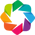

In [1]:
import wandb
import pandas as pd
import holoviews as hv
from holoviews import opts
import numpy as np 
from rdkit import Chem
from rdkit.Chem import Draw
from bokeh.io import export_png, export_svgs
import ast
import time
from collections import OrderedDict
hv.extension('bokeh')
import string

def export_svg(obj, filename):
    plot_state = hv.renderer('bokeh').get_plot(obj).state
    plot_state.output_backend = 'svg'
    export_svgs(plot_state, filename=filename)
    
    
def draw_multiple_mol(mols, mols_per_row=4, file_path=None, subImgSize=(300, 160)):
    mols_per_row = min(len(mols), mols_per_row)
    img=Draw.MolsToGridImage(mols, molsPerRow=mols_per_row, subImgSize=subImgSize, useSVG=True)
    if file_path:
        with open(file_path, 'w') as f_handle:
            f_handle.write(img.data)
    return img

import sys
sys.path.append('../../')
from utils import get_smiles_sizes, get_pairwise_similarities, get_similarity_size_evolution
    
api = wandb.Api()

import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('science')


plt.rcParams.update({
#     "font.family": "serif",   # specify font family here
#     "font.serif": ["Times"],  # specify font here
    "font.size":10})          # specify font size here

In [2]:
runs = api.runs("kjappelbaum/ga_replication_study")
summary_list = [] 
config_list = [] 
name_list = [] 
tag_list = []
id_list = []
for run in runs: 
    # run.summary are the output key/values like accuracy.  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict) 

    # run.config is the input metrics.  We remove special values that start with _.
    config_list.append({k:v for k,v in run.config.items() if not k.startswith('_')}) 
    
    # run.name is the name of the run.
    name_list.append(run.name)       
    tag_list.append(run.tags) 
    id_list.append(run.id)
    
summary_df = pd.DataFrame.from_records(summary_list) 
config_df = pd.DataFrame.from_records(config_list) 
name_df = pd.DataFrame({'name': name_list}) 
tag_df = pd.DataFrame({'tags': tag_list})
id_df = pd.DataFrame({'id': id_list})
all_df = pd.concat([name_df, id_df, tag_df, config_df,summary_df], axis=1)

## Let's look at some random run

In [3]:
run = api.run("kjappelbaum/ga_replication_study/2vnx7bpb")
metrics_dataframe = run.history()

In [4]:
hv.Curve(metrics_dataframe['fitness'], kdims='generation')

:Curve   [generation]   (fitness)

What one would expect from a penalty is that it *minimizes* the fitness. For this reason, we ran the GA with positive and negative $\beta$ for 500 generations.

Analyzing the discriminator scores as a function of the number of generations, we observe as the original authors that large, positive $\beta$ drive the GA to produce molecules that are similar to the reference/previous ones (hence, increase the discriminator score).

## Now, let's average

In [3]:
TARGET_TAG = sorted(["ga", "experiment_1", "beta_sweep"])

In [55]:
relevant_experiment_df = all_df[
    
    np.array([tag == TARGET_TAG for tag in all_df['tags']]) & 
    np.array([disc_layers == [100,10] for disc_layers in all_df['disc_layers']]) 
    
]

In [56]:
relevant_experiment_df

name        id                            tags  run  \
410         balmy-water-1443  2kohtgcv  [beta_sweep, experiment_1, ga]  0.0   
1735          deft-salad-119  1aka7u5o  [beta_sweep, experiment_1, ga]  0.0   
1736       crimson-paper-118  38u80m6b  [beta_sweep, experiment_1, ga]  0.0   
1737      restful-sunset-117  4seqfzoh  [beta_sweep, experiment_1, ga]  0.0   
1738     different-brook-116  3lxyhqtm  [beta_sweep, experiment_1, ga]  0.0   
1739          peach-moon-115  1oy7m1v8  [beta_sweep, experiment_1, ga]  0.0   
1740      chocolate-moon-114  xk5fjm0v  [beta_sweep, experiment_1, ga]  0.0   
1741        wise-glitter-113  3fmefd22  [beta_sweep, experiment_1, ga]  0.0   
1742             dry-sun-112  ogsr4wwy  [beta_sweep, experiment_1, ga]  0.0   
1743         eager-disco-111  7ghbx4od  [beta_sweep, experiment_1, ga]  0.0   
1744     sparkling-field-110  3tz9mx0l  [beta_sweep, experiment_1, ga]  0.0   
1745      stellar-shadow-109  23fx0jui  [beta_sweep, experiment_1, ga]  0.0   
1746         smooth-haze-108  p5gc5p5i  [beta_sweep, experiment_1, ga]  0.0   
1747     pious-firebrand-107  1z5jr8xr  [beta_sweep, experiment_1, ga]  0.0   
1748  blooming-firebrand-106  3r0h724h  [beta_sweep, experiment_1, ga]  0.0   
1749        cerulean-bee-105  ah0wzgl7  [beta_sweep, experiment_1, ga]  0.0   
1750        stoic-violet-104  1e9v01pc  [beta_sweep, experiment_1, ga]  0.0   
1751       lively-cosmos-103  2hapffst  [beta_sweep, experiment_1, ga]  0.0   
1752        dainty-field-102  21ptyseo  [beta_sweep, experiment_1, ga]  0.0   
1753        denim-breeze-101  3ewnd2j1  [beta_sweep, experiment_1, ga]  0.0   
1754         brisk-voice-100  35zrlmtm  [beta_sweep, experiment_1, ga]  0.0   
1755       noble-elevator-99  dvuhhj9y  [beta_sweep, experiment_1, ga]  0.0   
1756          daily-smoke-98  1cwt2fbx  [beta_sweep, experiment_1, ga]  0.0   
1757           easy-field-97  172vqmz6  [beta_sweep, experiment_1, ga]  0.0   
1758       logical-deluge-96  3kjn5eju  [beta_sweep, experiment_1, ga]  0.0   
1759         fanciful-dew-95  gbfpy1ts  [beta_sweep, experiment_1, ga]  0.0   
1760        revived-glade-94  3m7uxw45  [beta_sweep, experiment_1, ga]  0.0   
1761          avid-valley-93  1zbuuiq0  [beta_sweep, experiment_1, ga]  0.0   
1762    visionary-pyramid-92  30hwl9bg  [beta_sweep, experiment_1, ga]  0.0   
1763         silvery-leaf-91  2gy45eqx  [beta_sweep, experiment_1, ga]  0.0   
1764         magic-donkey-90  41a5p12x  [beta_sweep, experiment_1, ga]  0.0   
1765          spring-wind-89  u9py3jsy  [beta_sweep, experiment_1, ga]  0.0   
1766        visionary-fog-88  2thqhexp  [beta_sweep, experiment_1, ga]  0.0   
1767         young-yogurt-87  17a84t6s  [beta_sweep, experiment_1, ga]  0.0   
1768       azure-elevator-86  30g4qm5t  [beta_sweep, experiment_1, ga]  0.0   
1769      fancy-resonance-85  1rc31q12  [beta_sweep, experiment_1, ga]  0.0   
1773      feasible-sponge-81  3iwj1xth  [beta_sweep, experiment_1, ga]  0.0   
1774          atomic-oath-80  2sgnr44o  [beta_sweep, experiment_1, ga]  0.0   

        beta watchtime disc_layers     disc_enc_type  generation_size  \
410     50.0       NaN   [100, 10]  properties_rdkit            500.0   
1735   -50.0       NaN   [100, 10]  properties_rdkit            500.0   
1736    50.0       NaN   [100, 10]  properties_rdkit            500.0   
1737   100.0       NaN   [100, 10]  properties_rdkit            500.0   
1738  -100.0       NaN   [100, 10]  properties_rdkit            500.0   
1739    -1.0       NaN   [100, 10]  properties_rdkit            500.0   
1740     1.0       NaN   [100, 10]  properties_rdkit            500.0   
1741    10.0       NaN   [100, 10]  properties_rdkit            500.0   
1742   -10.0       NaN   [100, 10]  properties_rdkit            500.0   
1743     0.0       NaN   [100, 10]  properties_rdkit            500.0   
1744    -0.1       NaN   [100, 10]  properties_rdkit            500.0   
1745     0.1       NaN   [100, 10]  properties_rdkit            50

In [57]:
tested_betas = relevant_experiment_df['beta'].unique()

In [58]:
tested_betas

array([ 5.e+01, -5.e+01,  1.e+02, -1.e+02, -1.e+00,  1.e+00,  1.e+01,
       -1.e+01,  0.e+00, -1.e-01,  1.e-01,  1.e+03, -1.e+03,  2.e+01])

In [59]:
def get_fitness_evolution_for_runs(beta, all_df=relevant_experiment_df):
    relevant_runs = all_df[all_df['beta']==beta]
    run_ids = relevant_runs['id']
    
    fitness = []
    
    for run_id in run_ids: 
        try:
            run = api.run(f"kjappelbaum/ga_replication_study/{run_id}")
            metrics_dataframe = run.history()
            if len(metrics_dataframe['fitness_no_discr'].values) == 500:
                fitness.append(metrics_dataframe['fitness_no_discr'].values)
        except Exception:
            pass
        time.sleep(1)
        
    return fitness

In [60]:
def get_fitness_evolution_summary(beta, all_df=relevant_experiment_df):
    fitness_array = get_fitness_evolution_for_runs(beta, all_df)
    
    mean = np.mean(fitness_array, axis=0)
    std = np.std(fitness_array, axis=0)
    
    return {
        'mean': mean, 
        'std': std
    }

In [61]:
results = {}
for beta in [-100, -50, -10, -0.1, 0, 0.1, 10, 50, 100]:
    time.sleep(1)
    print(f"working on {beta}")
    results[beta] = get_fitness_evolution_summary(beta)
    while not isinstance(results[beta]['mean'], np.ndarray):  
        results[beta] = get_fitness_evolution_summary(beta)

working on -100
working on -50
working on -10


/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encoun

working on -0.1


/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encoun

working on 0
working on 0.1
working on 10


/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encoun

working on 50


/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encoun

working on 100


In [62]:
import matplotlib
norm = matplotlib.colors.Normalize(vmin=-110, vmax=110)
cmap = matplotlib.cm.get_cmap('coolwarm')

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
curve_neg_100 = hv.Curve(results[-100]['mean'], label="β=-100").opts(
    hv.opts.Curve(color=cmap(norm(-100))))

arr_100_curves = []
arr_100 = get_fitness_evolution_for_runs(100)
for arr in arr_100:
    c=hv.Curve(arr).opts(
    hv.opts.Curve(color=cmap(norm(100)), alpha=.1))
    arr_100_curves.append(c)
    
curve_neg_50 = hv.Curve(results[-50]['mean'], label="β=-50").opts(
    hv.opts.Curve(color=cmap(norm(-50))))
curve_neg_10 = hv.Curve(results[-10]['mean'], label="β=-10").opts(
   hv.opts.Curve(color=cmap(norm(-10))))
curve_neg_01 = hv.Curve(results[-0.1]['mean'], label="β=-0.1").opts(
   hv.opts.Curve(color=cmap(norm(-0.1))))

curve_0 = hv.Curve(results[0]['mean'], label="β=0").opts(
   hv.opts.Curve(color=cmap(norm(0))))


curve_pos_100 = hv.Curve(results[100]['mean'], label="β=100").opts(
   hv.opts.Curve(color=cmap(norm(100))))
curve_pos_50 = hv.Curve(results[50]['mean'], label="β=50").opts(
    hv.opts.Curve(color=cmap(norm(50))))
curve_pos_10 = hv.Curve(results[10]['mean'], label="β=10").opts(
   hv.opts.Curve(color=cmap(norm(10))))
curve_pos_01 = hv.Curve(results[0.1]['mean'], label="β=0.1").opts(
   hv.opts.Curve(color=cmap(norm(0.1))))

In [65]:
%%opts Curve  [height=400 width=700, xlabel='generation', ylabel='J(m)']  


overlay = hv.Overlay([
    curve_neg_100, curve_neg_50, curve_neg_10, curve_neg_01,
    curve_0,
    curve_pos_01, curve_pos_10, curve_pos_50, curve_pos_100
])

overlay.opts(legend_cols=8, legend_position='bottom_left')
overlay

:Overlay
   .Curve.Β_equals_hyphen_minus_100           :Curve   [x]   (y)
   .Curve.Β_equals_hyphen_minus_50            :Curve   [x]   (y)
   .Curve.Β_equals_hyphen_minus_10            :Curve   [x]   (y)
   .Curve.Β_equals_hyphen_minus_0_full_stop_1 :Curve   [x]   (y)
   .Curve.Β_equals_0                          :Curve   [x]   (y)
   .Curve.Β_equals_0_full_stop_1              :Curve   [x]   (y)
   .Curve.Β_equals_10                         :Curve   [x]   (y)
   .Curve.Β_equals_50                         :Curve   [x]   (y)
   .Curve.Β_equals_100                        :Curve   [x]   (y)

In [ ]:
export_svg(overlay, filename='beta_sweep.svg')

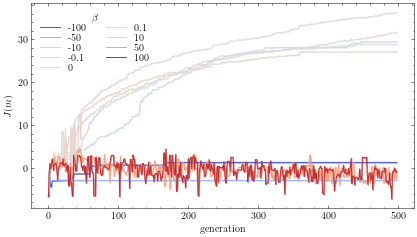

In [64]:
fig, ax = plt.subplots(1,1, figsize=(6,3.5))


ax.plot(results[-100]['mean'], label='-100', c=cmap(norm(-100)))
ax.fill_between(np.arange(0, 500), 
                results[-100]['mean']- results[-100]['std'], 
                results[-100]['mean']+ results[-100]['std'], 
                label='__nolegend__',  color=cmap(norm(-100)), alpha=.5)


ax.plot(results[-50]['mean'], label='-50', c=cmap(norm(-50)))
ax.fill_between(np.arange(0, 500), 
                results[-50]['mean']- results[-50]['std'], 
                results[-50]['mean']+ results[-50]['std'], 
                label='__nolegend__',  color=cmap(norm(-50)), alpha=.5)

ax.plot(results[-10]['mean'], label='-10', c=cmap(norm(-10)))
ax.fill_between(np.arange(0, 500), 
                results[-10]['mean']- results[-10]['std'], 
                results[-10]['mean']+ results[-10]['std'], 
                label='__nolegend__',  color=cmap(norm(-10)), alpha=.5)

ax.plot(results[-0.1]['mean'], label='-0.1', c=cmap(norm(-0.1)))
ax.fill_between(np.arange(0, 500), 
                results[-0.1]['mean']- results[-0.1]['std'], 
                results[-0.1]['mean']+ results[-0.1]['std'], 
                label='__nolegend__',  color=cmap(norm(-0.1)), alpha=.5)

ax.plot(results[0]['mean'], label='0', c=cmap(norm(0)))
ax.fill_between(np.arange(0, 500), 
                results[0]['mean']- results[0]['std'], 
                results[0]['mean']+ results[0]['std'], 
                label='__nolegend__',  color=cmap(norm(0)), alpha=.5)

ax.plot(results[0.1]['mean'], label='0.1', c=cmap(norm(0.1)))
ax.fill_between(np.arange(0, 500), 
                results[0.1]['mean']- results[0.1]['std'], 
                results[0.1]['mean']+ results[0.1]['std'], 
                label='__nolegend__',  color=cmap(norm(0.1)), alpha=.5)

ax.plot(results[10]['mean'], label='10', c=cmap(norm(10)))
ax.fill_between(np.arange(0, 500), 
                results[10]['mean']- results[10]['std'], 
                results[10]['mean']+ results[10]['std'], 
                label='__nolegend__',  color=cmap(norm(10)), alpha=.5)

ax.plot(results[50]['mean'], label='50', c=cmap(norm(50)))
ax.fill_between(np.arange(0, 500), 
                results[50]['mean']- results[50]['std'], 
                results[50]['mean']+ results[50]['std'], 
                label='__nolegend__',  color=cmap(norm(50)), alpha=.5)

ax.plot(results[100]['mean'], label='100', c=cmap(norm(100)))
ax.fill_between(np.arange(0, 500), 
                results[100]['mean']- results[100]['std'], 
                results[100]['mean']+ results[100]['std'], 
                label='__nolegend__',  color=cmap(norm(100)), alpha=.5)


ax.legend(title=r"$\beta$", ncol=2, loc='upper left', labelspacing=0)
ax.set_xlabel('generation')
ax.set_ylabel(r'$J(m)$')
fig.tight_layout()

fig.savefig('j_evolution.pdf', bbox_inches='tight')

In [65]:
def get_size_similarity_evolution_for_runs(beta, all_df=relevant_experiment_df):
    relevant_runs = all_df[all_df['beta']==beta]
    run_ids = relevant_runs['id']
    
    sizes = []
    similarities = []
    complete_results = []
    
    for run_id in run_ids: 
        try:
            result = get_similarity_size_evolution(run_id)
            complete_results.append(result)
            if len(result['sizes']) == 500:
                sizes.append(result['sizes'])
                similarities.append(result['similarity'])
        except Exception:
            pass
        time.sleep(1)
        
    return OrderedDict([
        ('sizes', sizes), 
        ('similarities', similarities), 
        ('complete_results', complete_results)
    ])



In [66]:
def summarize_size_similarity_evolution(result_dict): 
    return {'size': 
               {
                   'std': np.std(result_dict['sizes'], axis=0),
                   'mean': np.mean(result_dict['sizes'], axis=0)
               },
            'similarities': 
               {
                   'std': np.std(result_dict['similarities'], axis=0),
                   'mean': np.mean(result_dict['similarities'], axis=0)
               }
           }

In [67]:
size_similarity_results = {}
summarized_size_similarity_results = {}

for beta in [-100, -50, -10, -0.1, 0, 0.1, 10, 50, 100]:
    time.sleep(1)
    print(f"working on {beta}")
    size_similarity_results[beta] = get_size_similarity_evolution_for_runs(beta)
    summarized_size_similarity_results[beta] = summarize_size_similarity_evolution(
        size_similarity_results[beta]
    )

working on -100
working on -50


/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


working on -10


/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


working on -0.1


/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


working on 0


/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


working on 0.1


/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


working on 10


/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


working on 50


/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kevinmaikjablonka/opt/miniconda3/envs/ga_replication/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


working on 100


In [81]:
import pickle

with open('size_similarity_result.pkl', 'wb') as fh:
    pickle.dump(size_similarity_results, fh)

In [ ]:
# ax[0].plot(summarized_size_similarity_results[-100]['similarities']['mean'],
#           label='-100', c=cmap(norm(-100))
#           )

# ax[0].fill_between(np.arange(5, 500),
#           summarized_size_similarity_results[-100]['similarities']['mean'] -
#           summarized_size_similarity_results[-100]['similarities']['std'],
#           summarized_size_similarity_results[-100]['similarities']['mean'] +
#           summarized_size_similarity_results[-100]['similarities']['std'],
#           label='__nolegend__', color=cmap(norm(-100)), alpha=.2
#           )


# ax[0].plot(summarized_size_similarity_results[-50]['similarities']['mean'],
#           label='-50', c=cmap(norm(-50))
#           )
# ax[0].fill_between(np.arange(5, 500),
#           summarized_size_similarity_results[-50]['similarities']['mean'] -
#           summarized_size_similarity_results[-50]['similarities']['std'],
#           summarized_size_similarity_results[-50]['similarities']['mean'] +
#           summarized_size_similarity_results[-50]['similarities']['std'],
#           label='__nolegend__', color=cmap(norm(-50)), alpha=.2
#           )



# ax[0].plot(summarized_size_similarity_results[50]['similarities']['mean'],
#           label='50', c=cmap(norm(50))
#           )
# ax[0].fill_between(np.arange(5, 500),
#           summarized_size_similarity_results[50]['similarities']['mean'] -
#           summarized_size_similarity_results[50]['similarities']['std'],
#           summarized_size_similarity_results[50]['similarities']['mean'] +
#           summarized_size_similarity_results[50]['similarities']['std'],
#           label='__nolegend__', color=cmap(norm(50)), alpha=.2
#           )



# ax[0].plot(summarized_size_similarity_results[100]['similarities']['mean'],
#           label='100', c=cmap(norm(100))
#           )

# ax[0].fill_between(np.arange(5, 500),
#           summarized_size_similarity_results[100]['similarities']['mean'] -
#           summarized_size_similarity_results[100]['similarities']['std'],
#           summarized_size_similarity_results[100]['similarities']['mean'] +
#           summarized_size_similarity_results[100]['similarities']['std'],
#           label='__nolegend__', color=cmap(norm(100)), alpha=.2
#           )


# # Sizes

# ax[1].plot(summarized_size_similarity_results[-100]['size']['mean'],
#           label='-100', c=cmap(norm(-100))
#           )

# ax[1].fill_between(np.arange(0, 500),
#           summarized_size_similarity_results[-100]['size']['mean'] -
#           summarized_size_similarity_results[-100]['size']['std'],
#           summarized_size_similarity_results[-100]['size']['mean'] +
#           summarized_size_similarity_results[-100]['size']['std'],
#           label='__nolegend__', color=cmap(norm(-100)), alpha=.2
#           )



# ax[1].plot(summarized_size_similarity_results[-50]['size']['mean'],
#           label='-50', c=cmap(norm(-50))
#           )

# ax[1].fill_between(np.arange(5, 500),
#           summarized_size_similarity_results[-50]['size']['mean'] -
#           summarized_size_similarity_results[-50]['size']['std'],
#           summarized_size_similarity_results[-50]['size']['mean'] +
#           summarized_size_similarity_results[-50]['size']['std'],
#           label='__nolegend__', color=cmap(norm(-50)), alpha=.2
#           )



# ax[1].plot(summarized_size_similarity_results[50]['size']['mean'],
#           label='50', c=cmap(norm(50))
#           )
# ax[1].fill_between(np.arange(5, 500),
#           summarized_size_similarity_results[50]['size']['mean'] -
#           summarized_size_similarity_results[50]['size']['std'],
#           summarized_size_similarity_results[50]['size']['mean'] +
#           summarized_size_similarity_results[50]['size']['std'],
#           label='__nolegend__', color=cmap(norm(50)), alpha=.2
#           )



# ax[1].plot(summarized_size_similarity_results[100]['size']['mean'],
#           label='100', c=cmap(norm(100))
#           )

# ax[1].fill_between(np.arange(0, 500),
#           summarized_size_similarity_results[100]['size']['mean'] -
#           summarized_size_similarity_results[100]['size']['std'],
#           summarized_size_similarity_results[100]['size']['mean'] +
#           summarized_size_similarity_results[100]['size']['std'],
#           label='__nolegend__', color=cmap(norm(100)), alpha=.2
#           )



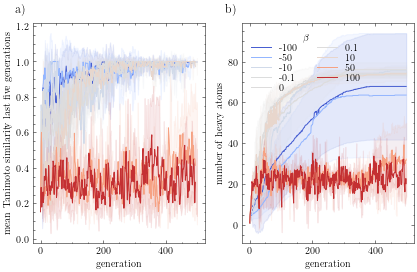

In [99]:
fig, ax = plt.subplots(1,2, figsize=(6,4))

# Similarities


for beta in [-100, -50, -10, -0.1, 0, 0.1, 10, 50, 100]:

    ax[0].plot(summarized_size_similarity_results[beta]['similarities']['mean'],
              label=f'{beta}', c=cmap(norm(beta))
              )

    ax[0].fill_between(np.arange(5, 500),
              summarized_size_similarity_results[beta]['similarities']['mean'] -
              summarized_size_similarity_results[beta]['similarities']['std'],
              summarized_size_similarity_results[beta]['similarities']['mean'] +
              summarized_size_similarity_results[beta]['similarities']['std'],
              label='__nolegend__', color=cmap(norm(beta)), alpha=.1
              )
    
    ax[1].plot(summarized_size_similarity_results[beta]['size']['mean'],
          label=f'{beta}', c=cmap(norm(beta))
          )

    ax[1].fill_between(np.arange(0, 500),
              summarized_size_similarity_results[beta]['size']['mean'] -
              summarized_size_similarity_results[beta]['size']['std'],
              summarized_size_similarity_results[beta]['size']['mean'] +
              summarized_size_similarity_results[beta]['size']['std'],
              label='__nolegend__', color=cmap(norm(beta)), alpha=.1
              )

ax[0].set_xlabel('generation')
ax[1].set_xlabel('generation')

ax[0].set_ylabel('mean Tanimoto similarity last five generations')
ax[1].set_ylabel('number of heavy atoms')

fig.tight_layout()

for i, a in enumerate(ax):
    a.text(-0.1, 1.05, string.ascii_lowercase[i] + ")", transform=a.transAxes, 
            size=12, weight='bold')
   
ax[1].legend(title=r'$\beta$', ncol=2, labelspacing=0, loc='upper left')

fig.tight_layout()

fig.savefig('similarity_evolution.pdf', bbox_inches='tight')


## Plotting the evolution of the molecules 

In [16]:
def draw_mol_evolution(mols, sampling_points = [10, 20, 40, 60, 100, 200, 300, 400], mols_per_row=8, file_path=None, subImgSize=(300, 160)):
    mols_per_row = min(len(mols), mols_per_row)
    selected_mols = [mols[idx] for idx in sampling_points]
    img=Draw.MolsToGridImage(selected_mols, molsPerRow=mols_per_row, subImgSize=subImgSize, useSVG=True)
    if file_path:
        with open(file_path, 'w') as f_handle:
            f_handle.write(img.data)
    return img




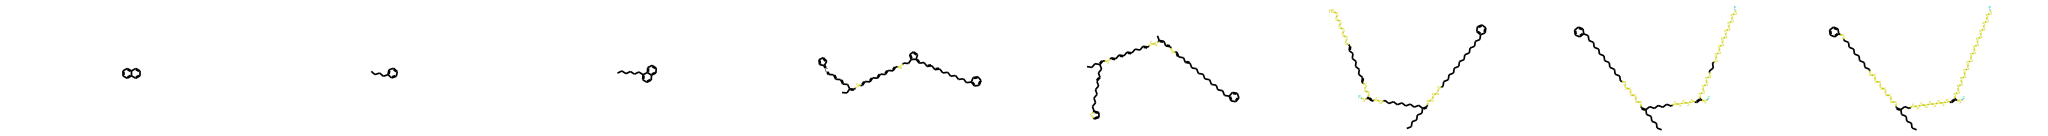

In [32]:
draw_mol_evolution(size_similarity_results[-100]['complete_results'][1]['mols'], file_path='evolution_-100.svg')

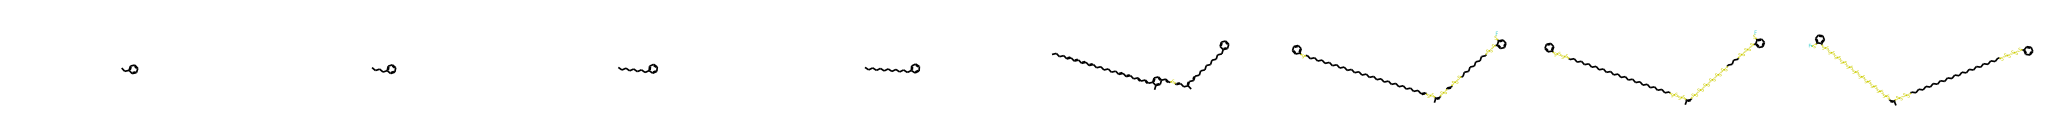

In [33]:
draw_mol_evolution(size_similarity_results[-10]['complete_results'][1]['mols'],  file_path='evolution_-10.svg')

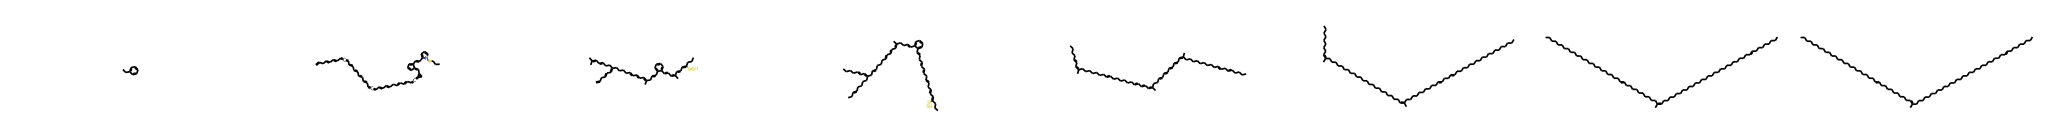

In [34]:
draw_mol_evolution(size_similarity_results[-0.1]['complete_results'][1]['mols'], file_path='evolution_-01.svg')

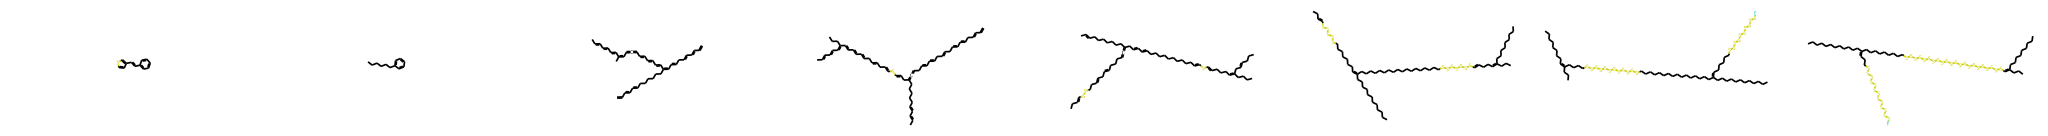

In [35]:
draw_mol_evolution(size_similarity_results[0]['complete_results'][1]['mols'],  file_path='evolution_0.svg')

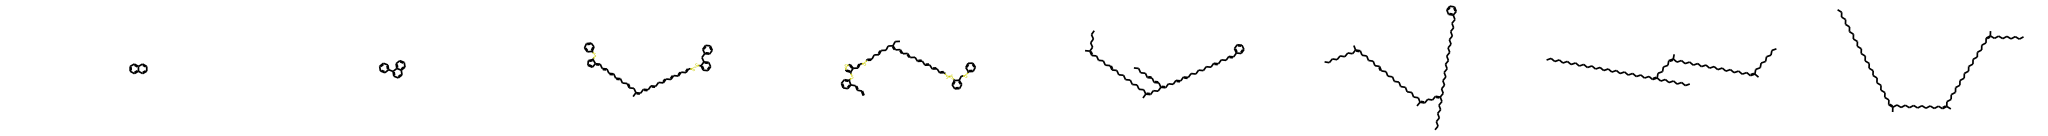

In [36]:
draw_mol_evolution(size_similarity_results[0.1]['complete_results'][1]['mols'],  file_path='evolution_01.svg')

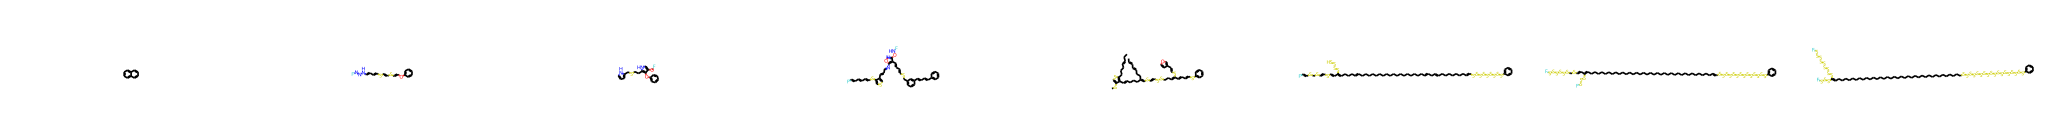

In [37]:
draw_mol_evolution(size_similarity_results[10]['complete_results'][1]['mols'], file_path='evolution_10.svg')

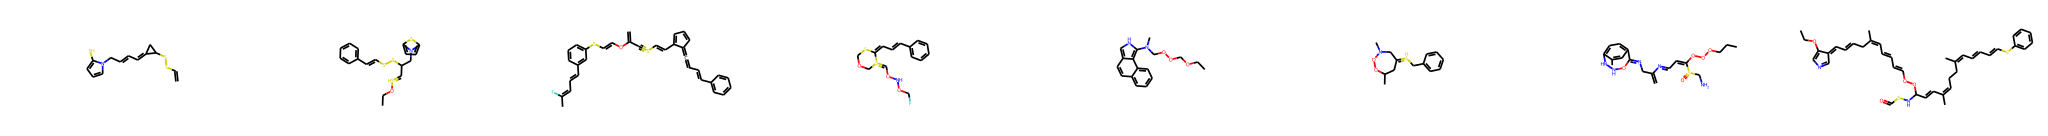

In [38]:
draw_mol_evolution(size_similarity_results[100]['complete_results'][1]['mols'], file_path='evolution_100.svg')

## Look into the timings

In [41]:
non_zero_beta =  all_df[(np.array([tag == TARGET_TAG for tag in all_df['tags']])) &
                        (all_df['beta'] != 0) 
                       ]

In [51]:
times = []

for run in non_zero_beta['id'].values:
    try:
        run = api.run(f"kjappelbaum/ga_replication_study/{run}")
        if (len(run.history()) > 400) and (len(run.history()) < 600):
            print(len(run.history()))
            minutes = run.summary['_runtime'] / 60
            times.append(minutes)
    except Exception:
        pass

498
405
500
501
500
501
501
499
498
501
500
498
501
500
501
499
501
500
500
500
501
497
500
501
501
500
501
500
501
500
500
498
501
501
500
501
501
499
500
500
499
501
501
500


In [52]:
print(f"The mean time for the GA runs with discriminator was {np.mean(times)} with standard deviation {np.std(times)}")

The mean time for the GA runs with discriminator was 505.77159090909083 with standard deviation 111.8296101184149
